In [61]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [62]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [63]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

# Preprocess all train images
test_generator = validation_data_gen.flow_from_directory(
    'data/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle = False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [64]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

In [65]:
# Load the saved model weights
emotion_model.load_weights('model/emotion_detection_model.h5')

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

In [66]:
# Evaluate the model using the test data generator
evaluation = emotion_model.evaluate_generator(test_generator)

# Print the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7772\3210452804.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = emotion_model.evaluate_generator(test_generator)


Test Loss: 2.0301060676574707
Test Accuracy: 0.6242685914039612


In [67]:
# Get the predicted labels for the test dataset
predictions = emotion_model.predict_generator(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels for the test dataset
true_labels = test_generator.classes
print("Confusion Matrix:")
print(confusion_mtx)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7772\4006466081.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


Confusion Matrix:
[[ 503    3   72   70  132  150   28]
 [  26   58    6    2    6   10    3]
 [ 111    0  431   49  148  197   88]
 [  57    0   39 1493   97   59   29]
 [ 102    0   62  126  740  180   23]
 [ 149    2  113  109  241  612   21]
 [  23    0   52   52   38   22  644]]


In [68]:
# Get the class labels
class_labels = list(test_generator.class_indices.keys())

In [69]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

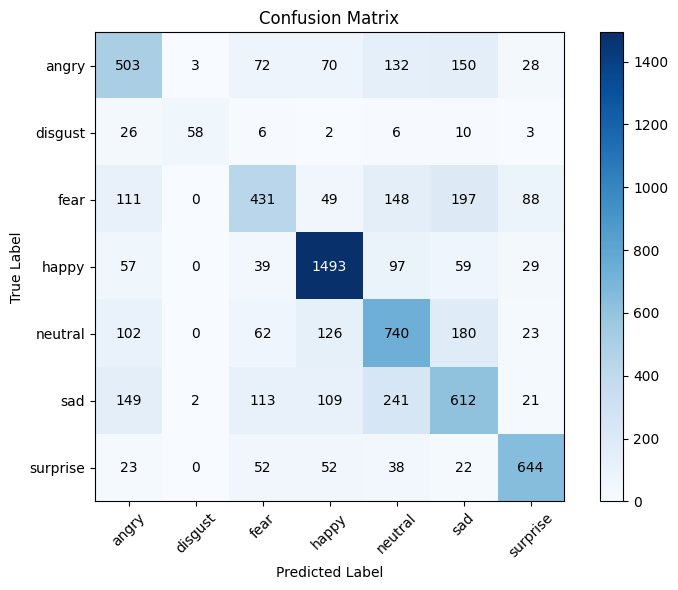

In [70]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell in the heatmap
thresh = confusion_mat.max() / 2.
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.show()